# Problem Statement


• Find the most important features of this dataset to predict the average fair.

• Figure out what other model can be applied to improve the model performance.

• What are other ways this data can be improved which will help in improving the Prediction.

# Import Librararies

In [8]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.compat import StringIO
import requests
import seaborn as sns
import scipy.stats as ss
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
url = 'http://users.stat.ufl.edu/~winner/data/airq402.dat'

In [10]:
r = requests.post(url)
data = r.content.decode('utf8')

In [11]:
df = pd.read_csv(StringIO(data), 
                 sep="\s+", 
                 skiprows=1, 
                 names=['City1','City2','Average Fare','Distance','Average weekly passengers',
                        'market leading airline','market share','Average fare','Low price airline','market share','price'])

In [12]:
path = '/Users/gopsrox/Upgrad/Assignment/'

In [13]:
import os
df.to_csv(os.path.join(path,r'airline.csv'))

In [14]:
df.columns

Index(['City1', 'City2', 'Average Fare', 'Distance',
       'Average weekly passengers', 'market leading airline', 'market share',
       'Average fare', 'Low price airline', 'market share.1', 'price'],
      dtype='object')

In [15]:
df.describe()

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,163.424374,1057.502503,672.527107,60.118519,166.703233,34.515806,143.225285
std,55.371544,643.307320,766.863056,19.374859,62.666775,27.087067,47.241860
min,50.520000,108.000000,181.410000,17.680000,50.520000,1.060000,49.610000
25%,126.025000,554.000000,257.115000,46.510000,124.120000,13.190000,113.825000
50%,161.360000,919.000000,404.780000,59.060000,161.440000,26.120000,137.830000
75%,197.435000,1455.000000,770.265000,73.520000,203.105000,52.950000,168.540000
max,401.230000,2724.000000,8950.760000,100.000000,490.030000,100.000000,387.940000


# EDA

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
City1                        999 non-null object
City2                        999 non-null object
Average Fare                 999 non-null float64
Distance                     999 non-null int64
Average weekly passengers    999 non-null float64
market leading airline       999 non-null object
market share                 999 non-null float64
Average fare                 999 non-null float64
Low price airline            999 non-null object
market share.1               999 non-null float64
price                        999 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 85.9+ KB


In [17]:
df.select_dtypes(include=['object']).nunique()

City1                     90
City2                     85
market leading airline    16
Low price airline         19
dtype: int64

In [18]:
#No null values in the dataset
df.isnull().values.any()

False

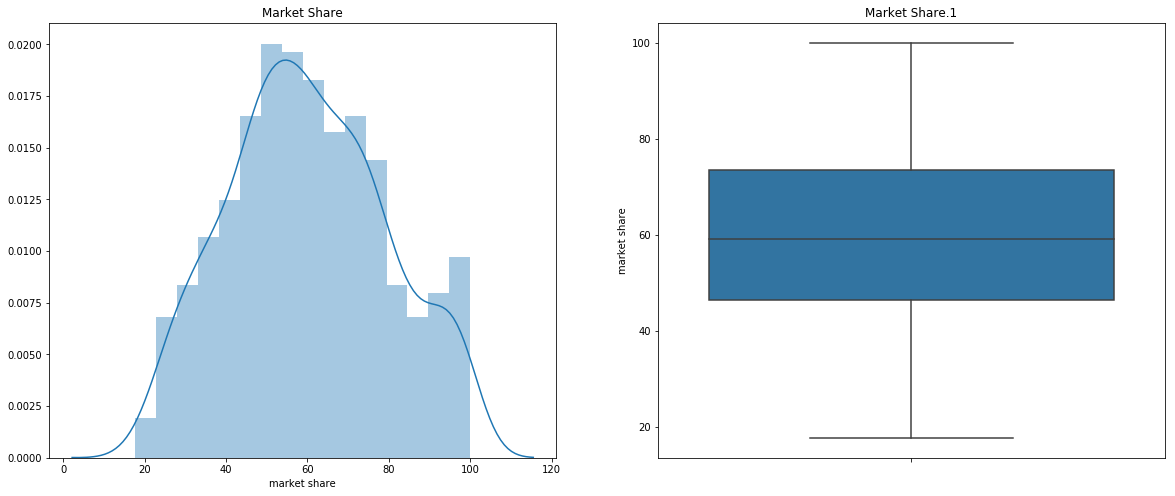

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Market Share')
sns.distplot(df['market share'])

plt.subplot(1,2,2)
plt.title('Market Share.1')
sns.boxplot(y=df['market share'])

plt.show()

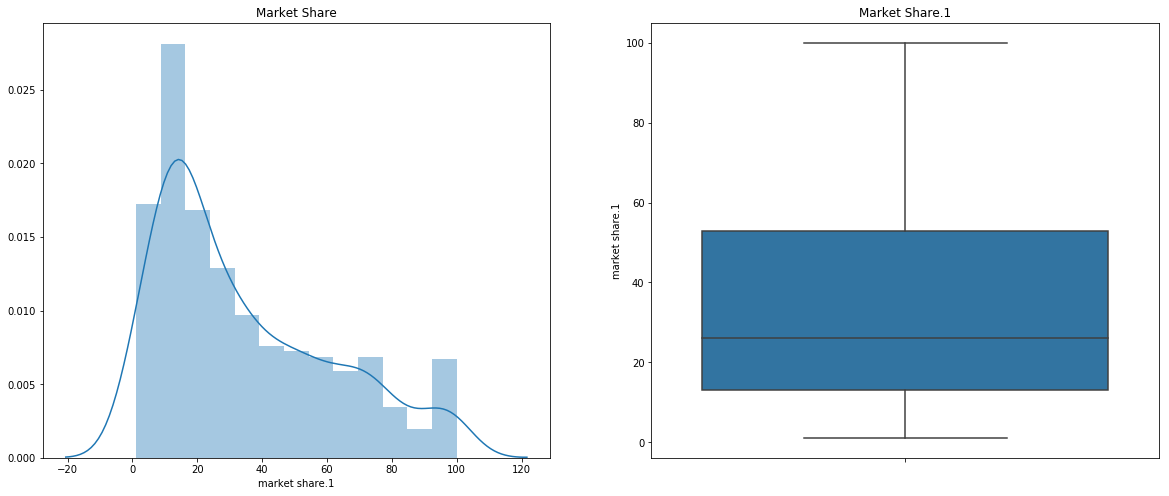

In [20]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Market Share')
sns.distplot(df['market share.1'])

plt.subplot(1,2,2)
plt.title('Market Share.1')
sns.boxplot(y=df['market share.1'])

plt.show()

In [21]:
print(df['market share.1'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    999.000000
mean      34.515806
std       27.087067
min        1.060000
25%       13.190000
50%       26.120000
75%       52.950000
85%       68.733000
90%       75.708000
100%     100.000000
max      100.000000
Name: market share.1, dtype: float64


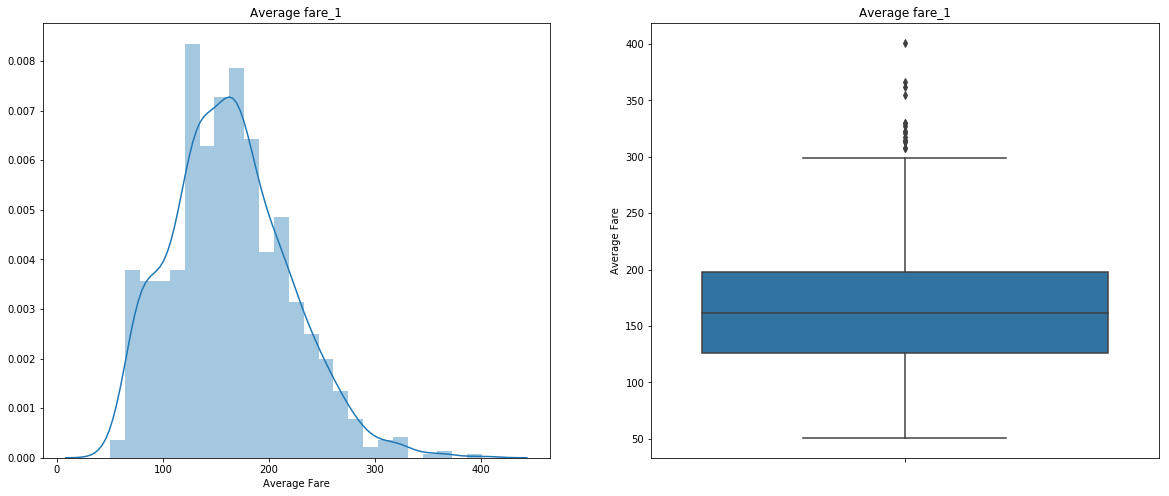

In [22]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Average fare_1')
sns.distplot(df['Average Fare'])

plt.subplot(1,2,2)
plt.title('Average fare_1')
sns.boxplot(y=df['Average Fare'])

plt.show()

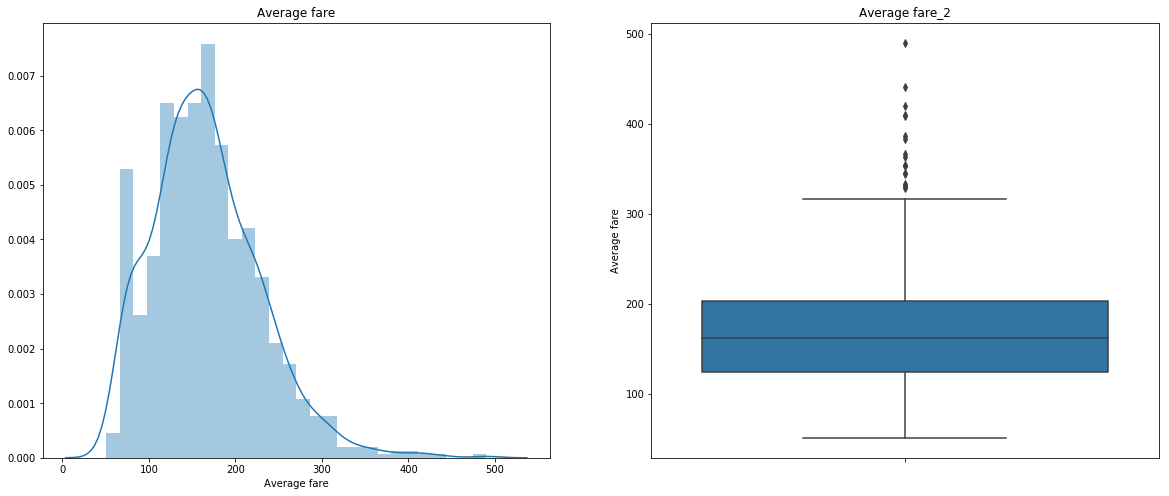

In [23]:
#Average fare of
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Average fare')
sns.distplot(df['Average fare'])

plt.subplot(1,2,2)
plt.title('Average fare_2')
sns.boxplot(y=df['Average fare'])

plt.show()

Inference :
    
-The plot seemed to be right-skewed, meaning that the most market share in the dataset are low(Below 40).

-There is a significant difference between the mean and the median of the market share distribution.

-The data points are far spread out from the mean, which indicates a high variance in the share prices.

-On the other hand 'Average Fare' as dependent variable as a quite similarity between my 'Average fare' Independent variable


#Visualising Categorical Data


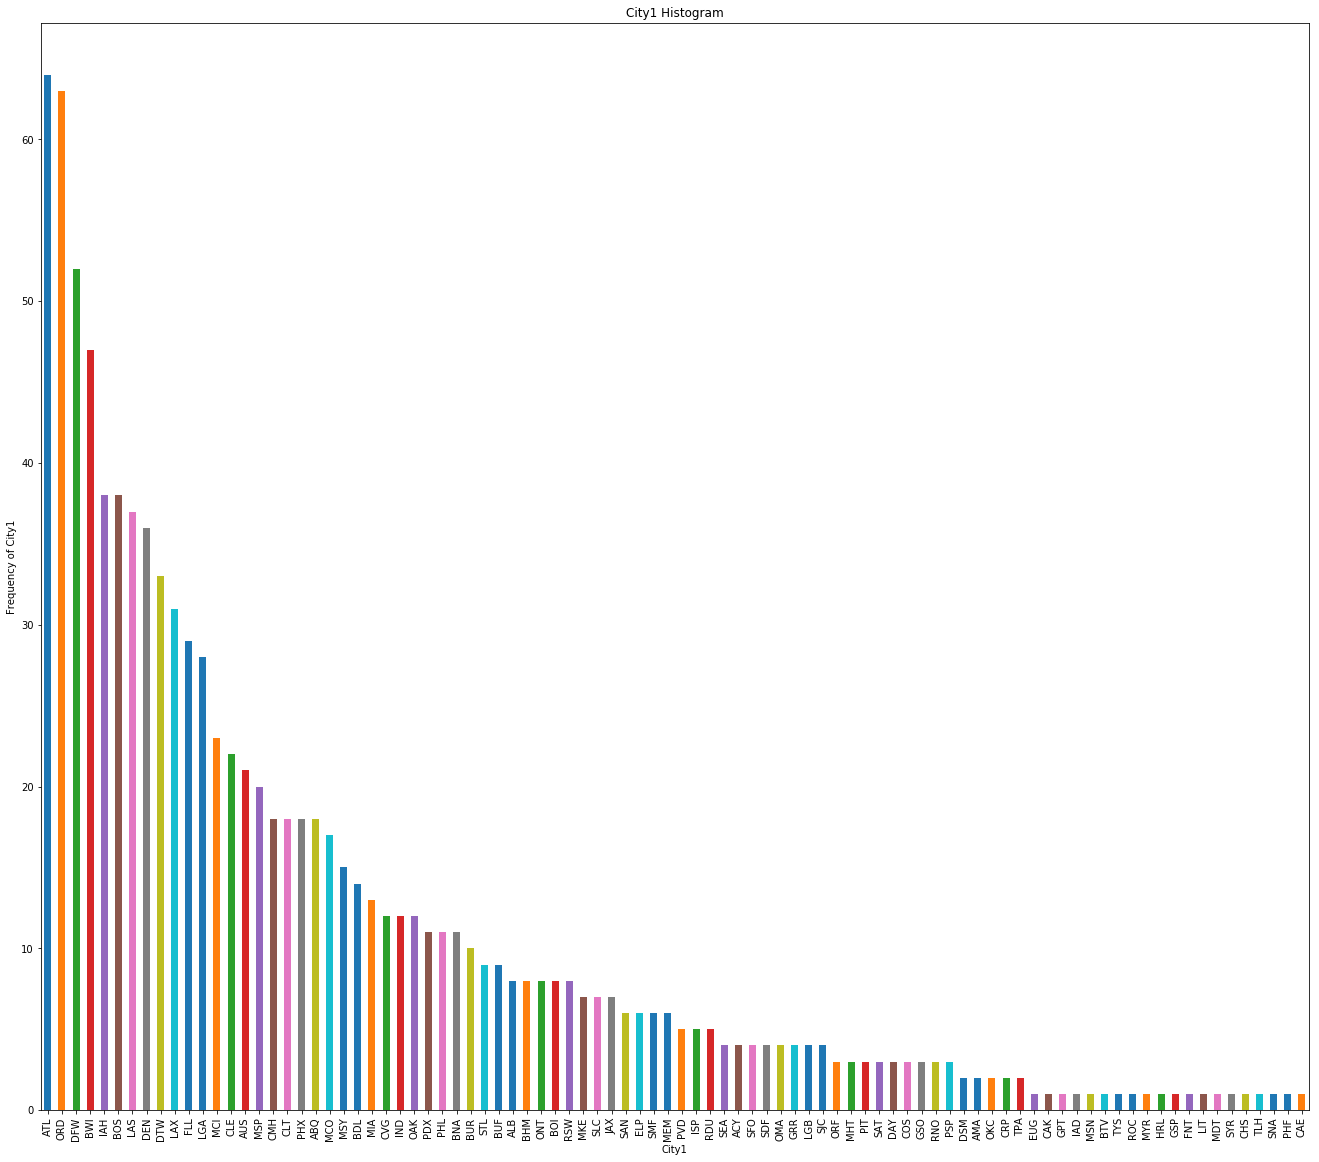

In [24]:
plt.figure(figsize=(50, 20))

plt.subplot(1,2,2)
plt1 = df['City1'].value_counts().plot('bar')
plt.title('City1 Histogram')
plt1.set(xlabel = 'City1', ylabel='Frequency of City1')

plt.show()

[Text(0, 0.5, 'Frequency of market leading airline'),
 Text(0.5, 0, 'market leading airline')]

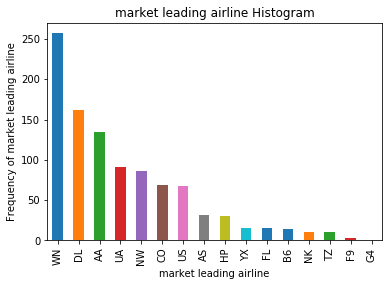

In [25]:
plt.subplot(1,1,1)
plt3 = df['market leading airline'].value_counts().plot('bar')
plt.title('market leading airline Histogram')
plt3.set(xlabel = 'market leading airline', ylabel='Frequency of market leading airline')

[Text(0, 0.5, 'Frequency of Low price airline'),
 Text(0.5, 0, 'Low price airline')]

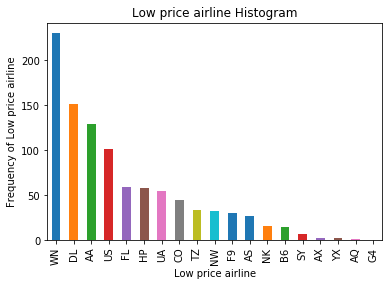

In [26]:
plt.subplot(1,1,1)
plt4 = df['Low price airline'].value_counts().plot('bar')
plt.title('Low price airline Histogram')
plt4.set(xlabel = 'Low price airline', ylabel='Frequency of Low price airline')

Inference:

-There is a good deal of overlap between the two city columns and two airline columns. 

In [27]:
from IPython.display import display

with pd.option_context('precision', 2):
    display(df.groupby(['City1'])['Average Fare'].describe()[['count', 'mean']])

,count,mean
City1,,
ABQ,18.0,157.03
ACY,4.0,125.48
ALB,8.0,148.03
AMA,2.0,97.66
ATL,64.0,168.86
AUS,21.0,164.74
BDL,14.0,163.84
BHM,8.0,138.09
BNA,11.0,151.93


In [28]:
cats = ['City1','City2','market leading airline','Low price airline']

In [29]:
city = df['City1'].append(df['City2'])
airlines = df['market leading airline'].append(df['Low price airline'])

In [30]:
print('unique locations: {} | unique airlines: {}'.format(city.nunique(), airlines.nunique()))

unique locations: 104 | unique airlines: 19


In [31]:
df[cats] = df[cats].astype('category')

In [32]:
df_1 = df.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

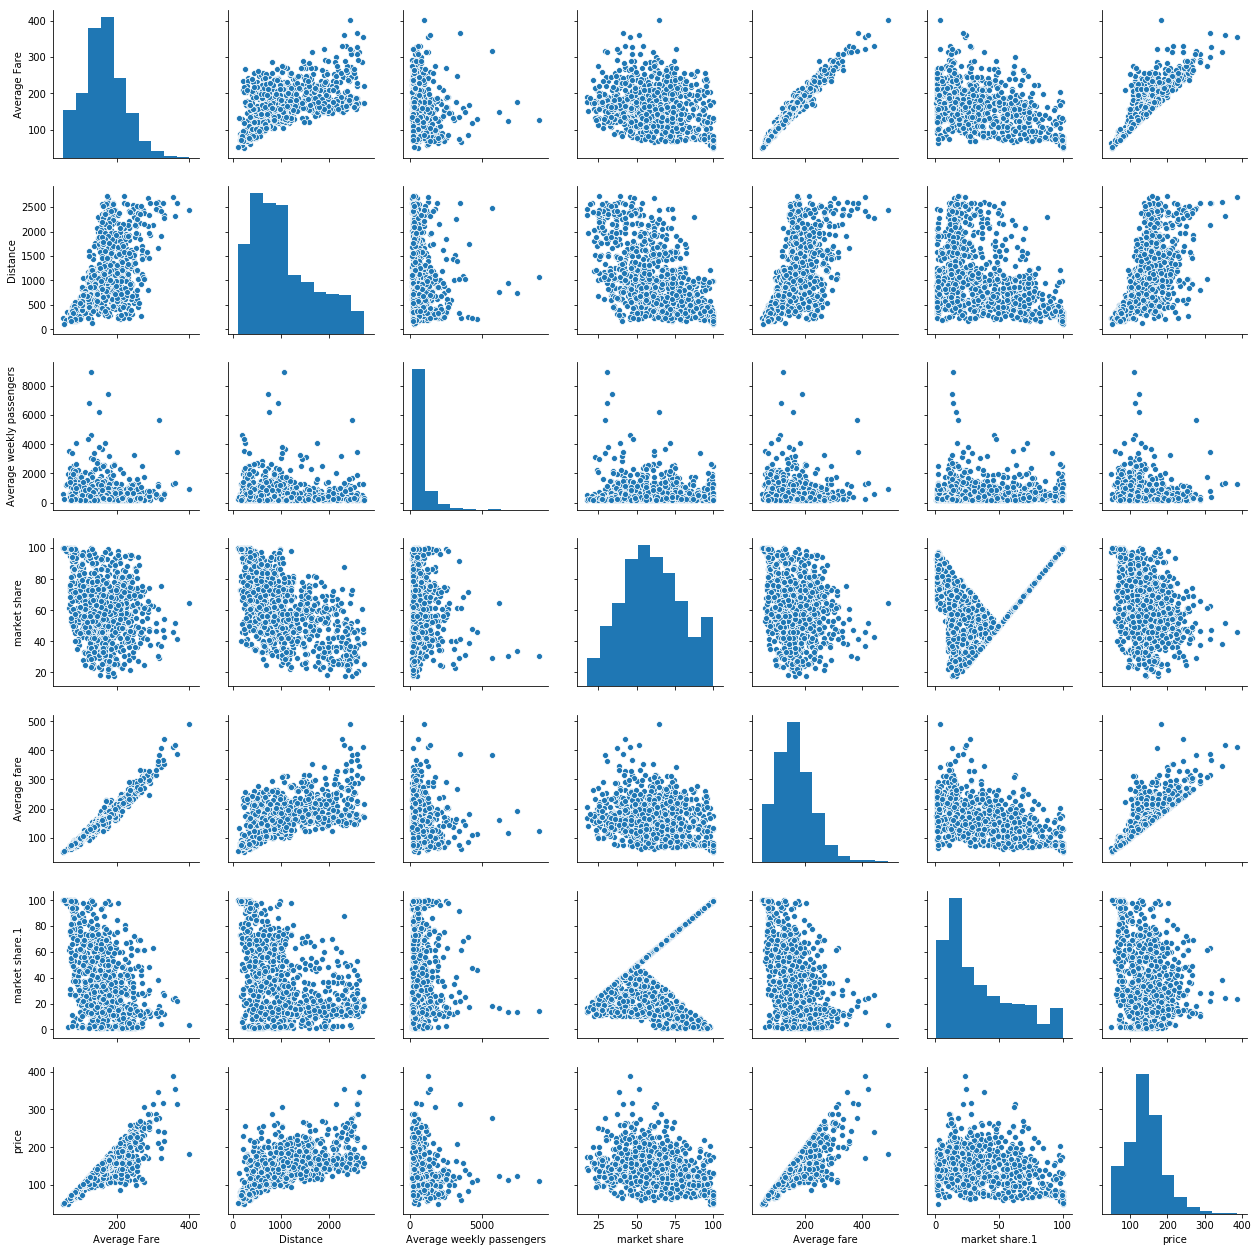

In [33]:
sns.pairplot(df);

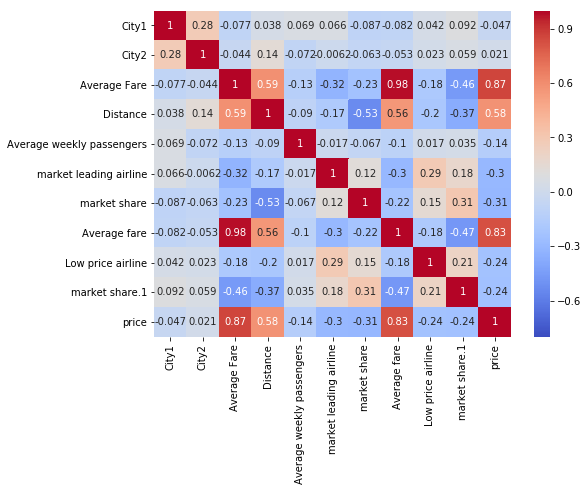

In [34]:
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_1.corr(),vmin=-0.8, annot=True, cmap='coolwarm',ax=ax);

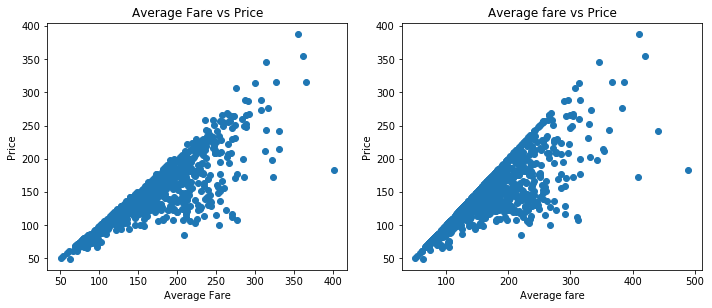

In [35]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df_1[x],df_1['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('Average Fare', 1)
scatter('Average fare', 2)

plt.tight_layout()

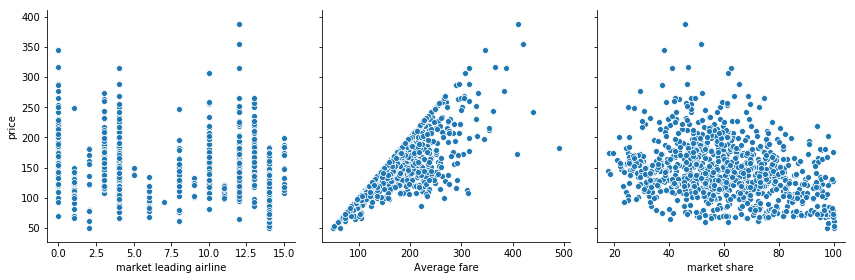

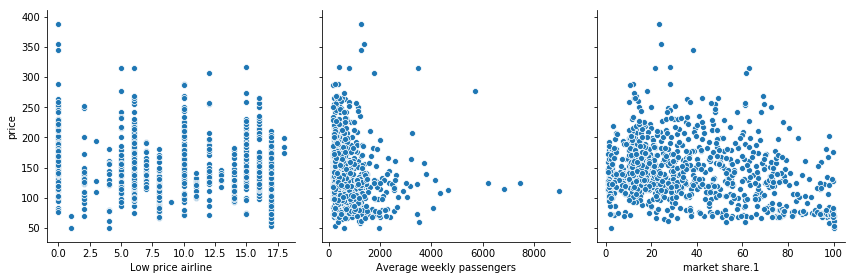

In [36]:
def pp(x,y,z):
    sns.pairplot(df_1, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('market leading airline', 'Average fare', 'market share')

pp('Low price airline', 'Average weekly passengers', 'market share.1')

Inference:
    
- 19 Unique Airlines and For locations, however, a set of 104 would quickly clutter the model interpretability and fare prediction

- To overcome the above problem, instead of treating them as category,convert City1, City2 and all airlines to Integers for a better learning in linear regression which can find relation with Average Fare(target variable)

- This comes as no surprise as quite often, the leading airline controls such a large portion of the market share that they effectively set the price.

# Model Building

In [37]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df_1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
#Dividing data into X and y variables
y_train = df_train.pop('Average Fare')
X_train = df_train

In [39]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('City1', True, 1),
 ('City2', True, 1),
 ('Distance', True, 1),
 ('Average weekly passengers', True, 1),
 ('market leading airline', True, 1),
 ('market share', True, 1),
 ('Average fare', True, 1),
 ('Low price airline', True, 1),
 ('market share.1', True, 1),
 ('price', True, 1)]

In [41]:
X_train.columns[rfe.support_]

Index(['City1', 'City2', 'Distance', 'Average weekly passengers',
       'market leading airline', 'market share', 'Average fare',
       'Low price airline', 'market share.1', 'price'],
      dtype='object')

In [42]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,City1,City2,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
278,63,37,552,251.84,14,56.58,135.33,0,25.03,131.68
218,10,54,1197,593.04,4,68.85,178.74,16,12.37,138.12
909,68,76,647,959.78,14,60.50,110.14,10,37.39,106.89
718,44,40,2217,1002.50,12,36.21,245.95,0,16.87,225.24
111,5,58,868,461.41,14,48.73,133.15,10,39.81,131.63


In [43]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

Model-1

In [44]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:           Average Fare   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     2674.
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:11:57   Log-Likelihood:                -2526.4
No. Observations:                 699   AIC:                             5075.
Df Residuals:                     688   BIC:                             5125.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

p-vale of City2 seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.


In [45]:
X_train_new = X_train_rfe.drop(["City2"], axis = 1)

Model-2

In [46]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:           Average Fare   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     2963.
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:11:57   Log-Likelihood:                -2527.9
No. Observations:                 699   AIC:                             5076.
Df Residuals:                     689   BIC:                             5121.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

p-vale of City1 seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [47]:
X_train_new = X_train_new.drop(["City1"], axis = 1)

Model-3

In [48]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:           Average Fare   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3332.
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:11:57   Log-Likelihood:                -2528.5
No. Observations:                 699   AIC:                             5075.
Df Residuals:                     690   BIC:                             5116.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [49]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,45.20
5,Average fare,4.88
8,price,4.48
1,Distance,2.12
7,market share.1,1.73
4,market share,1.63
3,market leading airline,1.20
6,Low price airline,1.20
2,Average weekly passengers,1.05


dropping Average fare because of high VIF value. (we have already seen this high multicollinearity in above scatterplot)

In [50]:
X_train_new = X_train_new.drop(["Average fare"], axis = 1)

Model-4

In [51]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:           Average Fare   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     561.6
Date:                Sun, 29 Sep 2019   Prob (F-statistic):          3.16e-280
Time:                        10:11:57   Log-Likelihood:                -3150.4
No. Observations:                 699   AIC:                             6317.
Df Residuals:                     691   BIC:                             6353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [52]:
checkVIF(X_train_new)

,Features,VIF
0,const,45.19
1,Distance,2.05
7,price,1.69
4,market share,1.50
6,market share.1,1.24
3,market leading airline,1.20
5,Low price airline,1.17
2,Average weekly passengers,1.04


dropping Distance because of high VIF value.

In [53]:
X_train_new = X_train_new.drop(["Distance"], axis = 1)

Model-5

In [54]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:           Average Fare   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     619.5
Date:                Sun, 29 Sep 2019   Prob (F-statistic):          2.30e-274
Time:                        10:11:57   Log-Likelihood:                -3167.3
No. Observations:                 699   AIC:                             6349.
Df Residuals:                     692   BIC:                             6381.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [55]:
X_train_new = X_train_new.drop(["Average weekly passengers"], axis = 1)

Model-6

In [56]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:           Average Fare   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     744.0
Date:                Sun, 29 Sep 2019   Prob (F-statistic):          9.63e-276
Time:                        10:11:57   Log-Likelihood:                -3167.5
No. Observations:                 699   AIC:                             6347.
Df Residuals:                     693   BIC:                             6374.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     24

In [57]:
checkVIF(X_train_new)

,Features,VIF
0,const,36.64
5,price,1.25
2,market share,1.23
1,market leading airline,1.19
4,market share.1,1.19
3,Low price airline,1.17


In [58]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Residual Analysis of Model

Text(0.5, 0, 'Errors')

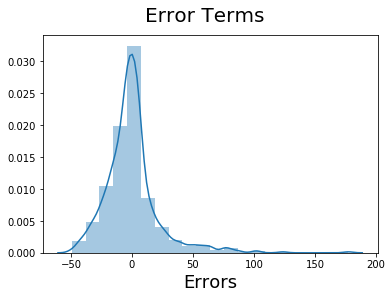

In [59]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [60]:
#Dividing into X and y
y_test = df_test.pop('Average Fare')
X_test = df_test

# Prediction and Evaluation

In [61]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [62]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [63]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.80583331461588

Text(0, 0.5, 'y_pred')

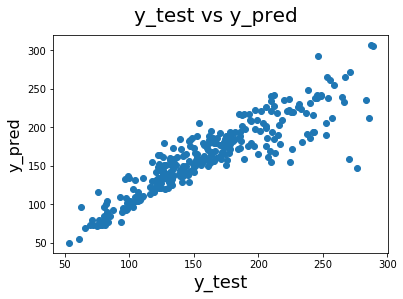

In [64]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [65]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           Average Fare   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     744.0
Date:                Sun, 29 Sep 2019   Prob (F-statistic):          9.63e-276
Time:                        10:11:58   Log-Likelihood:                -3167.5
No. Observations:                 699   AIC:                             6347.
Df Residuals:                     693   BIC:                             6374.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     24

# Conclusion

1.R-sqaured and Adjusted R-squared (extent of fit) - 0.843 and 0.843 - 84% variance explained.

2.F-stats and Prob(F-stats) (overall model fit) - 744.0 and 9.63e-276(approx. 0.0) - Model fit is significant and explained 84% variance is just not by chance.

3.p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

4.The most important features from the above analysis are market leading airline,low price airline and their market share with actual fare in each itiniary becuase from the interpretation made in EDA, it is as clearly visible that top-3 market leading airlines are same as low price airline i.e they have a great hold on market. 

5.However, feature set has to encapsulate more information like day, timing and booking details.The most important feature in the flight pricing prediction is the the day is a holiday or not, the day is weekday or weekend and the difference between the days.

6.Gradient boosting can be a better optimized model here with the theoritic aspect. The loss function is a measure indicating how good are model’s coefficients are at fitting the underlying data. A logical understanding of loss function would depend on what we are trying to optimise. For example, if we are trying to predict the average prices by using a regression, then the loss function would be based off the error between true and predicted average prices. One of the biggest motivations of using gradient boosting is that it allows one to optimise a user specified cost function, instead of a loss function that usually offers less control and does not essentially correspond with real world applications.
